In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargar datos del Ipeco
data = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20IPECO.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
data.columns = ['ipeco', 'coyuntura', 'expectativas', 'sea', 'da', 'sef', 'df', 'iif', 'ipecotm']

In [3]:
# Valores iniciales del Ipeco:
ipeco0 = 0.564465028
coyuntura0 = 0.375772273
expectativas0 = 0.688636166
sea0 = 0.503225806
da0 = 0.241887388
sef0 = 0.778145695
df0 = 0.502857143
iif0 = 0.78490566

In [4]:
# Multiplicar por el valor inicial
data['ipeco'] = data['ipeco']*ipeco0
data['coyuntura'] = data['coyuntura']*coyuntura0
data['expectativas'] = data['expectativas']*expectativas0
data['sea'] = data['sea']*sea0
data['da'] = data['da']*da0
data['sef'] = data['sef']*sef0
data['df'] = data['df']*df0
data['iif'] = data['iif']*iif0
data = data.drop('ipecotm', axis=1)

In [5]:
# Crear un dataframe vacío, con fechas mensuales desde el inicio del Ipeco
fecha = pd.date_range(start='2001-12-01', end='2021-02-01', freq='MS')
ipeco = pd.DataFrame(index=fecha)

In [6]:
# Fusionar las bases de datos
# pd.set_option('display.max_rows', None) 
ipeco = ipeco.merge(data, how='left', left_index=True, right_index=True)

In [7]:
# Datos a partir de mayo de 2005, en que el IPECO se empezó a publicar de manera mensual.
data_nona = ipeco['2005-05-01':]

In [9]:
# Datos en que los valores perdidos han sido reemplazados por estimaciones realizadas mediante interpolación lineal
data_fillna = ipeco.interpolate(method='linear', limit_area='inside')

In [10]:
def ipeco_preprocessing():
    
    data = pd.read_csv('https://raw.githubusercontent.com/percepcioneseconomicas/indices/main/CEEN%20UDD%20IPECO.csv', parse_dates=True, dayfirst=True, index_col='Fecha')
    data.columns = ['ipeco', 'coyuntura', 'expectativas', 'sea', 'da', 'sef', 'df', 'iif', 'ipecotm']
    data = data.drop(['coyuntura', 'expectativas', 'ipecotm'], axis=1)

    data['ipeco'] = data['ipeco']*0.564465028
    data['sea'] = data['sea']*0.503225806
    data['da'] = data['da']*0.241887388
    data['sef'] = data['sef']*0.778145695
    data['df'] = data['df']*0.502857143
    data['iif'] = data['iif']*0.78490566

    fecha = pd.date_range(start='2001-12-01', end='2021-02-01', freq='MS')
    ipeco = pd.DataFrame(index=fecha) 
    ipeco = ipeco.merge(data, how='left', left_index=True, right_index=True)

    return ipeco.interpolate(method='linear', limit_area='inside')    

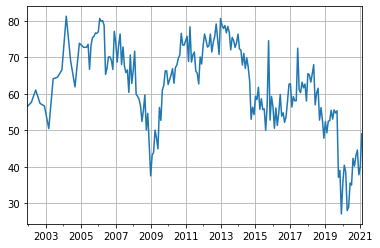

In [15]:
ipeco = ipeco_preprocessing()
ipeco['ipeco'].plot()
plt.grid()